In [1]:
# import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
from dateutil import parser
import numpy as np
import matplotlib as mpl
import math
from dateutil.relativedelta import relativedelta
from pandas.plotting import scatter_matrix
import seaborn as sns

# Setting main variables
## Load SE fluviometric stations only

mainDir = "./PLD_Outubro_2018/10_out18_RV0_logENA_Mer_d_preco_m_0/"
plotsDir = mainDir + 'Plot/' 
MONTHS = [datetime.date(2000, m, 1).strftime('%B') for m in range(1, 13)]
POSTOSSE = []
POSTOSSE.append([1, 2, 211, 6, 7])
POSTOSSE.append([8, 9, 10, 11, 12])
POSTOSSE.append([14, 15, 16, 17, 18])
POSTOSSE.append([22, 251, 20, 24, 25])
POSTOSSE.append([206, 207, 28, 205, 209])
POSTOSSE.append([31, 32, 33, 34, 237])
POSTOSSE.append([238, 239, 240, 242, 243])
POSTOSSE.append([244, 245, 246, 47, 48])
POSTOSSE.append([49, 50, 51, 52, 61])
POSTOSSE.append([62, 63, 266, 160, 161])
POSTOSSE.append([160, 161, 104, 109, 117])
POSTOSSE.append([118, 116, 120, 121, 122])
POSTOSSE.append([123, 125, 197, 198])
POSTOSSE.append([129, 130])
POSTOSSE.append([134, 263, 267, 149])
POSTOSSE.append([141, 148, 144])
POSTOSSE.append([154, 201])
POSTOSSE.append([203, 135])       
POSTOSSE.append([199, 262, 183, 265, 295])               
POSTOSSE.append([296, 23, 196, 225, 227])                
POSTOSSE.append([228, 229, 230, 241, 249])               
POSTOSSE.append([294, 145, 278, 279])                
POSTOSSE.append([281, 282, 283, 285, 287])                
POSTOSSE.append([289, 99, 259, 252])                        
POSTOSSE.append([291, 247, 248, 313, 261])

yearsRV1 = np.arange(1962, 1971)
yearsDAT = np.arange(2010, 2019)

postoConcat = []

for p in POSTOSSE:
    postoConcat = postoConcat + p

postoConcat.sort()
#postoConcat = postoConcat[0:5]

plot = True
save = False

In [3]:
def histPlot (df, plotName):
    nBins = round(math.sqrt(df.shape[0]))
    print (nBins)
    print (df)
    plt.figure()
    df.hist(bins = nBins)
    plt.savefig(plotsDir +  plotName)
    plt.show()

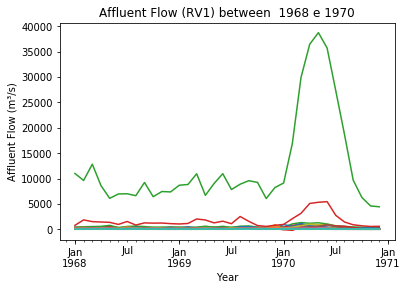

In [4]:
# Read Vazoes RV1

save = False
## Plot always start in January
initialYear = 1968
finalYear = '1970-12-31'
monthsIndex = pd.date_range(str(initialYear)+'-01-01', finalYear, 
              freq='MS').tolist()

vazoes = pd.read_csv(mainDir + 'VAZOES_RV1.txt', sep='\s+',
names = ['Posto', 'Ano'] + MONTHS)

## filter by year
vazoes = vazoes[vazoes.Ano >= initialYear]
finalYearInt = int(finalYear[0:4])
vazoes = vazoes[vazoes.Ano <= finalYearInt]
#postos = POSTOSSE[0]
postos = postoConcat
if (plot == True):
    ax = plt.gca()
    
for posto in postos:
    ## filter by "posto"
    vazoesSE = vazoes.loc[vazoes.Posto == posto]
    vazoesSEData = vazoesSE.iloc[:,2:]
    vz = pd.Series()
    ## transform rows into columns by concatenating each year in horizontal axis
    for index, row in vazoesSEData.iterrows():
        vz = pd.concat([vz, row], axis=0)

    ## reindex series with year/month pattern
    vz.index = monthsIndex
    if (plot == True):
        #histPlot(vz, "histogramas/Vazoes_RV1/VazaoRV1_posto" + str(posto) + "-1932-1970")
        vz.plot(ax = ax, label='F.S ' + str(posto))

if (plot == True):
    #plt.legend(loc='best')
    plt.title('Affluent Flow (RV1) between  ' + str(initialYear) + ' e ' + finalYear[0:4])
    plt.xlabel('Year')
    plt.ylabel('Affluent Flow (m\N{SUPERSCRIPT THREE}/s)')
    
    if (save == True):
        plt.savefig(plotsDir +  "AF0_RV1_" +str(initialYear)+"_" + str(finalYearInt)+ ".jpg", bbox_inches='tight')
        
    plt.show()
    


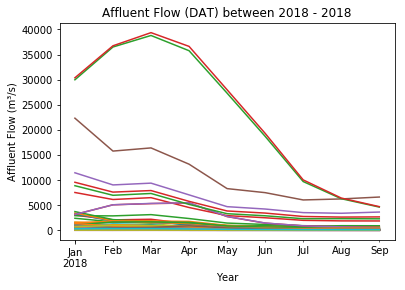

In [4]:
# Read Vazoes DAT
save = False
## Plot always start in January
initialYear = 2018
finalYear = '2018-09-30'
monthsIndex = pd.date_range(str(initialYear)+'-01-01', finalYear, 
              freq='MS').tolist()

vazoes = pd.read_csv(mainDir + 'VAZOES_DAT.txt', sep='\s+',
names = ['Posto', 'Ano'] + MONTHS)

#print(vazoes)

## filter by year
vazoes = vazoes[vazoes.Ano >= initialYear]
finalYearInt = int(finalYear[0:4])
vazoes = vazoes[vazoes.Ano <= finalYearInt]
#postos = POSTOSSE[0]
postos = postoConcat
if (plot == True):
    ax = plt.gca()
    
vzDATComp = pd.DataFrame()
for posto in postos:
    ## filter by "posto"
    vazoesSE = vazoes.loc[vazoes.Posto == posto]
    vazoesSEData = vazoesSE.iloc[:,2:]
    vzDAT = pd.Series()
    ## transform rows into columns by concatenating each year in horizontal axis
    for index, row in vazoesSEData.iterrows():
        vzDAT = pd.concat([vzDAT, row], axis=0)

    vzDAT = vzDAT.drop(['October','November', 'December'])
    ## reindex series with year/month pattern
    vzDAT.index = monthsIndex
    vzDATComp['Vazão posto ' + str(posto)] = vzDAT
    if (plot == True):
        #histPlot(vzDAT, "histogramas/Vazoes_DAT/VazaoDAT_posto" + str(posto) + "-2018-2004")
        vzDAT.plot(ax = ax, label='F.S ' + str(posto))

if (plot == True):
    #plt.legend(loc='best')
    plt.title('Affluent Flow (DAT) between ' + str(initialYear) + ' - ' + finalYear[0:4])
    plt.xlabel('Year')
    plt.ylabel('Affluent Flow (m\N{SUPERSCRIPT THREE}/s)')
    
    if (save == True):
        plt.savefig(plotsDir +  "AFG_DAT_" + str(initialYear) + "_"+ str(finalYearInt)+ ".jpg", bbox_inches='tight')
        
    plt.show()

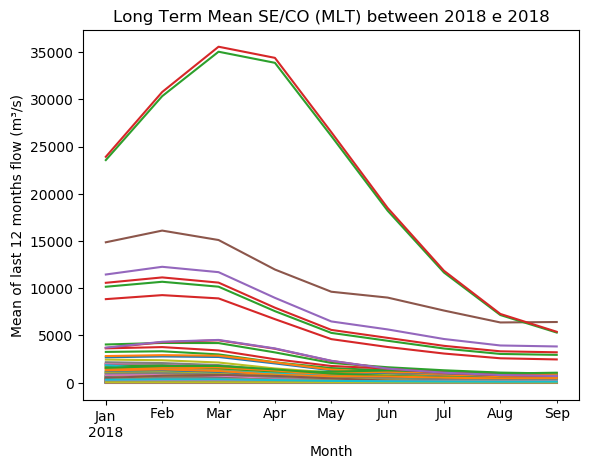

In [83]:
# Read MLT
save = False
initialYear = 2018
finalYear = '2018-09-30'
monthsIndex = pd.date_range(str(initialYear) + '-01-01', finalYear, 
              freq='MS').tolist()

mlt = pd.read_csv(mainDir + 'MLT_DAT.txt', sep='\s+',
names = ['Posto'] + MONTHS)

#postos = POSTOSSE[15]
postos = postoConcat
if (plot == True):
    ax = plt.gca()

mltComp = pd.DataFrame()
for posto in postos:
    ## filter by "posto"
    mltPosto = mlt.loc[mlt.Posto == posto]
    mltPosto = mltPosto.iloc[:, 1:]
    mltS = pd.Series()
    ## transform rows into columns by concatenating each year in horizontal axis
    for index, row in mltPosto.iterrows():
        mltS = pd.concat([mltS, row], axis=0)

    mltS = mltS.drop(['October','November', 'December'])
    ## reindex series with year/month pattern
    mltS.index = monthsIndex
    mltComp['MLT posto ' + str(posto)] = mltS
    if (plot == True):
        #histPlot(vzDAT, "histogramas/MLT/MLT_posto" + str(posto) + "-2018-2017")
        mltS.plot(ax = ax, label='F.S ' + str(posto))

if (plot == True):
    #plt.legend(loc='best')
    plt.title('Long Term Mean SE/CO (MLT) between ' + str(initialYear) + ' e ' + finalYear[0:4])
    plt.xlabel('Month')
    plt.ylabel('Mean of last 12 months flow (m\N{SUPERSCRIPT THREE}/s)')
    
    if (save == True):  
        plt.savefig(plotsDir +  "LTM_2018.jpg", bbox_inches='tight')
        
plt.show()

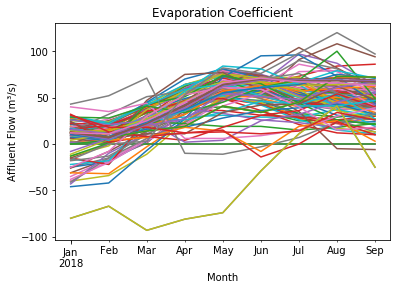

In [6]:
# Read Hidr
save = False
hidr = pd.read_csv(mainDir + 'HIDR.csv', parse_dates = True, sep=";")

# The only temporal data is evaporation
hidr = hidr.loc[hidr.Posto.isin(postoConcat)]
hidrEv = hidr[hidr.columns[24:36]]
hidrEv = hidrEv

postosHidr = hidr.Posto

idxPostos = list ( set(postosHidr) & set(postoConcat)) 

hidrEv = hidrEv.transpose()
monthsIndex = pd.date_range('2018-01-01', '2018-09-30', 
              freq='MS').tolist()


hidrEv = hidrEv.drop(['Evap.Men.(10)','Evap.Men.(11)', 'Evap.Men.(12)'])
hidrEv.index = monthsIndex

#print (hidrEv.columns)
#print(idxPostos)
hidrEv.columns = idxPostos

#print (hidrEv)
if (plot == True):
    hidrEv.plot(legend = False)
    #plt.legend(loc='best')
    plt.title('Evaporation Coefficient')
    plt.xlabel('Month')
    plt.ylabel('Affluent Flow (m\N{SUPERSCRIPT THREE}/s)')
    if (save == True):
       plt.savefig(plotsDir +  "EVG.jpg", bbox_inches='tight')
    plt.show()
    


In [ ]:
#PLD Weekly
save = False
initialYear = 2004
finalYear = 2018

mydateparser = lambda x: pd.datetime.strptime(x, "%d/%m/%Y")
pldW = pd.read_csv(mainDir + 'precos.csv', parse_dates=['Data Início', 'Data Fim'], date_parser=mydateparser, sep=";")
pldW = pldW.loc[pldW.Ano >= initialYear]
#pldW = pldW.loc[pldW.Ano <= finalYear]

if (plot == True):
    ax = plt.gca()
    pldW.set_index('Data Início').plot(y='Pesado SE', ax=ax, label ='Heavy SE')
    pldW.set_index('Data Início').plot(y='Médio SE', ax=ax, label = 'Medium SE')
    pldW.set_index('Data Início').plot(y='Leve SE', ax=ax, label = 'Light SE')
    plt.title('Weekly Settlement Price of Differences (PLD) between ' + str(initialYear) + ' - ' + str(finalYear))
    plt.xlabel('Year')
    plt.ylabel('R$/MWh')
    
    if (save == True):
        plt.savefig(plotsDir + 'SPD_Weekly-'+ str(initialYear) +'-'+ str(finalYear) + '.jpg', bbox_inches='tight' )
        
    plt.show()

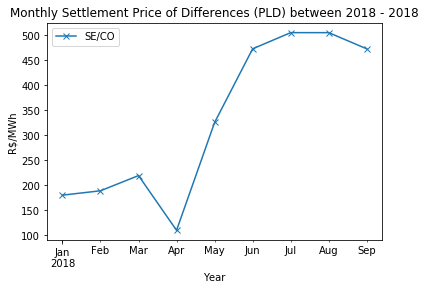

In [7]:
#Mean PLD
save = False
initialDate = datetime.datetime.strptime('2018-01-01', '%Y-%m-%d')
finalDate = datetime.datetime.strptime('2018-10-31', '%Y-%m-%d')
mydateparser = lambda x: pd.datetime.strptime(x, "%m/%Y")
meanPLD = pd.read_csv(mainDir + 'PLD_medio.csv', parse_dates=['Mês'], sep="\s+", date_parser=mydateparser)
meanPLD = meanPLD.sort_index(axis=0, ascending=False)
meanPLD = meanPLD.loc[meanPLD.Mês >= initialDate]
meanPLD = meanPLD.loc[meanPLD.Mês <= finalDate]
meanPLDSE = meanPLD.iloc[:,0:2]
meanPLDSE.set_index('Mês').plot(marker='x')
if (plot == True):
    plt.title('Monthly Settlement Price of Differences (PLD) between ' + str(initialDate.year) + ' - ' + str(finalDate.year))
    plt.xlabel('Year')
    plt.ylabel('R$/MWh')
    
    if (save == True):
        #histPlot(meanPLDSE, "histogramas/PLD/PLD_MES" + str(posto) + str(initialDate.year) + ' - ' + str(finalDate.year))
        plt.savefig(plotsDir + 'SPD_Monthly-'+ str(initialDate.year) +'-'+ str(finalDate.year) + '.jpg', bbox_inches='tight' )

plt.show()

In [98]:
# Correlation plots
save = False

initialDate = '2018-01-01'
finalDate = '2018-09-30'
meanPLDSE12 = meanPLDSE.loc[meanPLDSE.Mês >= initialDate]


idx = np.arange(9) + 1
indice = 0
#meanPLDSE12 = meanPLDSE12.assign(mlt = mltS.values)
meanPLDSE12.index = idx
#meanPLDSE12.set_index('Mês', inplace=True)

vzTemp = vzDATComp[vzDAT.index >= initialDate]
vzTemp = vzTemp[vzTemp.index <= finalDate]
vzTemp.index = idx
hidrEv.index = idx
#tempMatrix = [meanPLDSE12, hidrEv, vzTemp]
tempMatrix = [meanPLDSE12, hidrEv]
#tempMatrix = [meanPLDSE12, vzDATComp]
#tempMatrix = [meanPLDSE12, mltComp]
    
meanPLDSE12 = pd.concat(tempMatrix, axis=1)
#meanPLDSE12.columns = ['MÊS','PLD SE/CO', 'MLT', 
#                       'Ev P1', 'Ev P2', 'Ev P211', 'Ev P6', 'Ev P7',
#                      'V P1', 'V P2', 'V P211', 'V P6', 'V P7']

#print (mltAgg)
#print (meanPLDSE12)

#print(meanPLDSE12)
meanPLDSE12.set_index('Mês', inplace=True)
print(meanPLDSE12)
meanPLDSE12 = meanPLDSE12.rename(index=str, columns={"SE/CO": "PLD SE/CO"})
cor = meanPLDSE12.corr()

             SE/CO   1   2   6   7   8   9  10  11  12 ...   282  283  285  \
Mês                                                    ...                   
2018-01-01  180.07   0   2   6  13  12  10   8   8   9 ...   -80   12   10   
2018-02-01  188.79   2   5   6   2   2   5   3   5   7 ...   -67    4    5   
2018-03-01  219.23  29  31  31  25  19  18  20  24  24 ...   -93   23   24   
2018-04-01  109.71  40  40  42  40  37  38  44  48  52 ...   -81   36   37   
2018-05-01  325.46  51  48  48  52  49  53  56  60  65 ...   -74   55   55   
2018-06-01  472.87  46  44  47  51  46  52  54  58  64 ...   -29   61   61   
2018-07-01  505.18  32  30  33  43  42  48  46  51  54 ...    11   66   64   
2018-08-01  505.18  23  24  29  42  40  43  44  48  52 ...    41   79   75   
2018-09-01  472.75  24  27  33  39  38  39  44  48  50 ...   -25   71   71   

            287  289  291  294  295  296  313  
Mês                                            
2018-01-01   12   12   31   12   12   12  -17

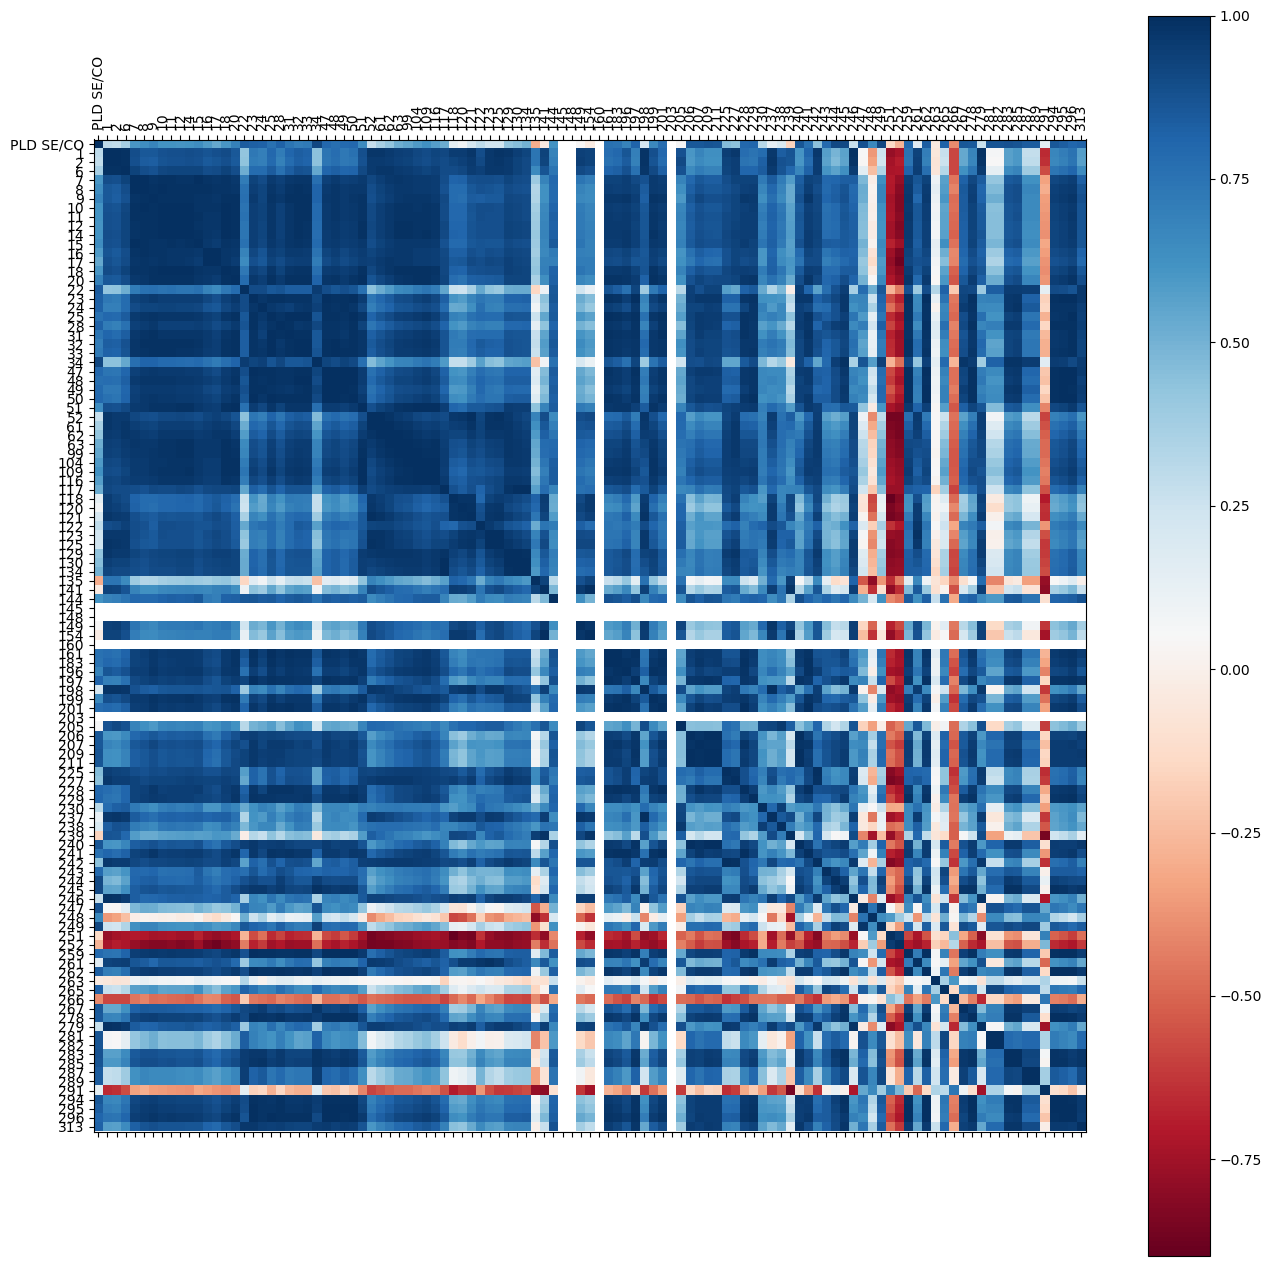

In [99]:
#print (cor)
save = True
if (plot == True):
    plt.rcParams['figure.figsize'] = [300, 300]
    plt.matshow(cor, cmap = 'RdBu')
    plt.xticks(range(len(meanPLDSE12.columns)), meanPLDSE12.columns, rotation='vertical')
    plt.yticks(range(len(meanPLDSE12.columns)), meanPLDSE12.columns, rotation='horizontal')
    plt.colorbar()
    #plt.title('Correlação entre o PLD e o MLT entre 2018/01 e 2018/09')
    
    if (save == True):
        #cor.to_csv(plotsDir+ '\correlationPLD_parte3.csv', sep=';', mode='w')
        plt.savefig(plotsDir + 'PLD_EV.jpg', bbox_inches='tight')
        
    plt.show()
    mpl.rcParams.update(mpl.rcParamsDefault)


        #plt.savefig(plotsDir + 'scatter.jpg', bbox_inches='tight' )

KeyboardInterrupt: 

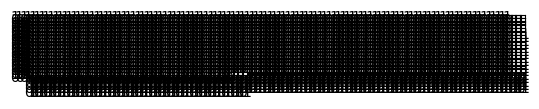

In [67]:
'''
if (plot == True):    
    scatter_matrix(meanPLDSE12, alpha=0.3)
    sm = pd.plotting.scatter_matrix(meanPLDSE12, diagonal='kde')
    for subaxis in sm:
        for ax in subaxis:
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])
            ax.set_ylabel("")
            ax.set_xlabel("")
    pic = sm[0][0].get_figure()  
    pic.savefig("MyScatter.png") 
'''